![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [ ]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [ ]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

<Axes: title={'center': 'Sentiminetos por aerolínea'}, xlabel='airline'>

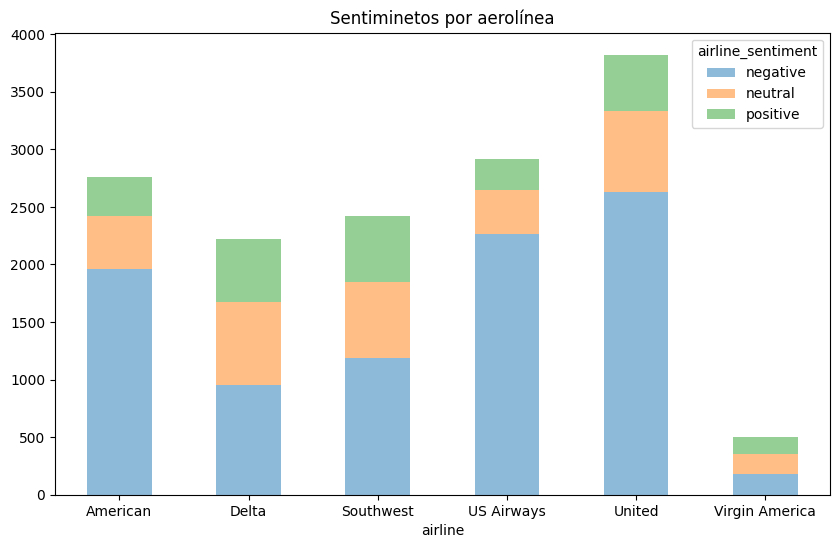

In [ ]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")

### Liberias y Variables de interés y predicción

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score

In [5]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [6]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [7]:
# Celda 1
tw_1 = CountVectorizer()
X_tw_train = tw_1.fit_transform(X_train)

RF = RandomForestClassifier()
RF.fit(X_tw_train, y_train)

X_tw_test = tw_1.transform(X_test)
y_pred = RF.predict(X_tw_test)
ACC = accuracy_score(y_test, y_pred)
print("El accuracy del modelo es: " + str(ACC))

El accuracy del modelo es: 0.7711092715231788


Al utilizar CountVectorizer, se obtiene un modelo Random Forest con un accuracy de 0.7711. Un desempeño aceptable, pero no óptimo en la busqueda de generar clasificaciones y predicciones confiables.

### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [8]:
# Celda 2
tw_2 = CountVectorizer(stop_words='english')
X_tw_train_2 = tw_2.fit_transform(X_train)

RF2 = RandomForestClassifier()
RF2.fit(X_tw_train_2, y_train)

X_tw_test_2 = tw_2.transform(X_test)
y_pred2 = RF2.predict(X_tw_test_2)
ACC2 = accuracy_score(y_test, y_pred2)
print("El accuracy del modelo es: " + str(ACC2))

El accuracy del modelo es: 0.7605546357615894


Al eliminar stop-words del texto, no se observa una mejora en el desempeño del modelo (por el contario el accuracy score se reduce a 0.7605). Si bien es una reducción minima, es claro que la eliminación de estas palabras en estos tweets en particular, genera una perdida de algún grado de información.

### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [9]:
# Celda 3
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('wordnet')

def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word) for word in words]

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [10]:
tw_3 =  CountVectorizer(analyzer=split_into_lemmas)
X_tw_train_3 = tw_3.fit_transform(X_train)

RF3 = RandomForestClassifier()
RF3.fit(X_tw_train_3, y_train)

X_tw_test_3 = tw_3.transform(X_test)
y_pred3 = RF3.predict(X_tw_test_3)
ACC3 = accuracy_score(y_test, y_pred3)
print("El accuracy del modelo es: " + str(ACC3))

El accuracy del modelo es: 0.7607615894039735


Utilizando lematización no se observa una mejora en el desempeño del modelo (comparado con el modelo original tiene un menor accuracy score 0.7607) lo que puede considerarse el resultado de una nueva pérdida de información y contexto necesarios para el análisis de los textos.

### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [11]:
# Celda 4
tw_4 =  CountVectorizer(stop_words='english', analyzer=split_into_lemmas)
X_tw_train_4 = tw_4.fit_transform(X_train)

RF4 = RandomForestClassifier()
RF4.fit(X_tw_train_4, y_train)

X_tw_test_4 = tw_4.transform(X_test)
y_pred4 = RF4.predict(X_tw_test_4)
ACC4 = accuracy_score(y_test, y_pred4)
print("El accuracy del modelo es: " + str(ACC4))

El accuracy del modelo es: 0.7549668874172185


La combinación de técnicas (eliminación de stop words y Lematización) produjo un modelo con un accuracy score de 0.7549, que comparado de nuevo con el modelo original presenta un peor desempeño (lo que puede ser evidencia clara de que este tipo de procesos disminuyen la información dipsonible para el análisis).

### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

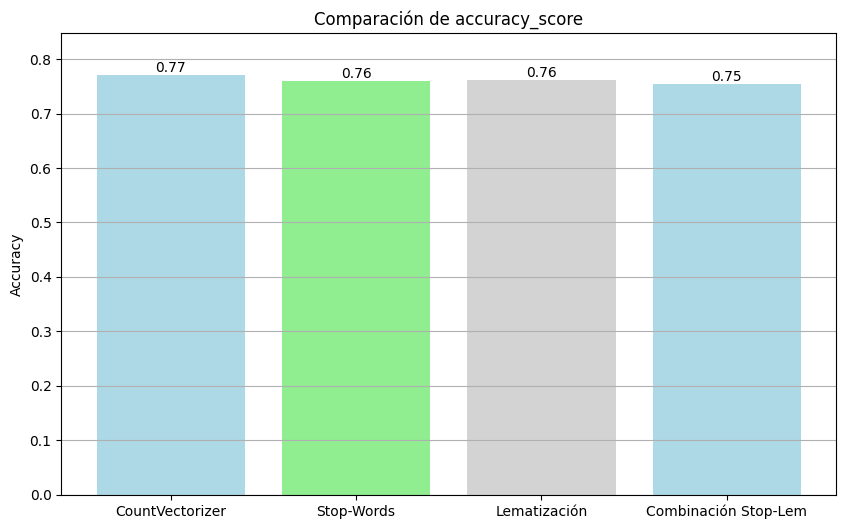

In [12]:
# Celda 5
import matplotlib.pyplot as plt

model_names = ['CountVectorizer', 'Stop-Words', 'Lematización', 'Combinación Stop-Lem']
accuracy = [ACC, ACC2, ACC3, ACC4]

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracy, color=['lightblue', 'lightgreen', 'lightgray', 'lightblue'])

for bar, acc in zip(bars, accuracy):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{acc:.2f}',
             ha='center', va='bottom', color='black', fontsize=10)

plt.ylabel('Accuracy')
plt.title('Comparación de accuracy_score')
plt.ylim(0, max(accuracy) * 1.1)
plt.grid(axis='y')
plt.show()

**Mejor modelo**

El mejor modelo estimado, con un accuracy_score de 0.7711, fue el que incluyó el algoritmo CountVectorizer sin ningún tipo de procesamiento extra sobre el texto (salvo la transformación de palabras a minúsculas).

La ventaja más evidente de este enfoque es que no altera la información de ninguna forma (no elimina términos ni transforma o normaliza las palabras), lo que asegura que al momento del análisis se cuente con todo el texto disponible y lo que esto conlleva (contexto completo, términos especificos, etc).

Esta combinación de caraterísticas genera insumos apropiados para que el modelo de clasificación se estime con la mayor cantidad de datos posible y logre un desempeño aceptable.

**Peor modelo**

Por otro lado, el peor desempeño se encontró en el modelo que combinó varias técnicas de procesamiento de texto (Eliminación de StopWords y Lematización), con un accuracy_score de 0.7549.

Sin duda, contar con ambas técnicas al momento de generar modelos predictivos con textos es muy útil y aconsejable; sin embargo, se debe tener en cuenta que son procesos cuyo objetivo es simplificar las estructuras de los textos, lo que implica necesariamente dos desventajas:

1.   Pérdida de información (Se eliminan términos que podrían aportar al análisis y a la creación del contexto general del texto).

2.   Alteración de la forma original del texto (además de incluir pérdida de información, puede generar alteraciones de contextos y significados originales, alterando el análisis y los resultados).

